# Case Study - Sunlight in Austin


## 1. Reading in a data file
Now that you have identified the method to use to read the data, let's try to read one file. The problem with real data such as this is that the files are almost never formatted in a convenient way. In this exercise, there are several problems to overcome in reading the file. First, there is no header, and thus the columns don't have labels. There is also no obvious index column, since none of the data columns contain a full date or time.

Your job is to read the file into a DataFrame using the default arguments. After inspecting it, you will re-read the file specifying that there are no headers supplied.

In [1]:
# Import pandas
import pandas as pd

# Specifying path to the file
data_file = "datasets/NOAA_QCLCD_2011_hourly_13904.txt"

# Read in the data file: df
df = pd.read_csv(data_file)

# Print the output of df.head()
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


In [2]:
# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(data_file, header=None)

# Print the output of df_headers.head()
df_headers.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


Well done! Note how the column names are not informative. You'll fix this in the next exercise!

## 2. Re-assigning column names
After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.

In this exercise, you will begin this cleaning process by re-assigning column names and dropping unnecessary columns.

The comma separated string of column names, column_labels, and list of columns to drop, list_to_drop, have also been loaded for you.

In [5]:
column_labels

'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [6]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(",")

In [7]:
# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list
df.columns

Index(['Wban', 'date', 'Time', 'StationType', 'sky_condition',
       'sky_conditionFlag', 'visibility', 'visibilityFlag',
       'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_faren',
       'dry_bulb_farenFlag', 'dry_bulb_cel', 'dry_bulb_celFlag',
       'wet_bulb_faren', 'wet_bulb_farenFlag', 'wet_bulb_cel',
       'wet_bulb_celFlag', 'dew_point_faren', 'dew_point_farenFlag',
       'dew_point_cel', 'dew_point_celFlag', 'relative_humidity',
       'relative_humidityFlag', 'wind_speed', 'wind_speedFlag',
       'wind_direction', 'wind_directionFlag', 'value_for_wind_character',
       'value_for_wind_characterFlag', 'station_pressure',
       'station_pressureFlag', 'pressure_tendency', 'pressure_tendencyFlag',
       'presschange', 'presschangeFlag', 'sea_level_pressure',
       'sea_level_pressureFlag', 'record_type', 'hourly_precip',
       'hourly_precipFlag', 'altimeter', 'altimeterFlag', 'junk'],
      dtype='object')

In [9]:
list_to_drop

['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [10]:
# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis="columns")

# Print the output of df_dropped.head()
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

Fantastic! Now that you have informative column names, it is a lot easier to interpret the data! But there is still some tidying work to be done: You'll clean the datetime data in the next exercise.

## 3. Cleaning and tidying datetime data
In order to use the full power of pandas time series, you must construct a DatetimeIndex. To do so, it is necessary to clean and transform the date and time columns.

Your job is to clean up the date and Time columns and combine them into a datetime collection to be used as the Index.

In [11]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped.date.astype(str)

In [12]:
df_dropped['Time'].head()

0    153
1    253
2    353
3    453
4    553
Name: Time, dtype: int64

In [13]:
# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
df_dropped['Time'].head()

0    0153
1    0253
2    0353
3    0453
4    0553
Name: Time, dtype: object

In [14]:
# Concatenate the new date and Time columns: date_string
date_string = df_dropped.date + df_dropped.Time
date_string.head()

0    201101010153
1    201101010253
2    201101010353
3    201101010453
4    201101010553
dtype: object

In [15]:
# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
date_times.head()

0   2011-01-01 01:53:00
1   2011-01-01 02:53:00
2   2011-01-01 03:53:00
3   2011-01-01 04:53:00
4   2011-01-01 05:53:00
dtype: datetime64[ns]

In [16]:
# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   
2011-01-01 05:53:00      10.00             49          9.4             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0

Well done! All that's left now is to clean the numeric columns.



## 4. Cleaning the numeric columns
The numeric columns contain missing values labeled as 'M'. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as NaN.

The pandas function pd.to_numeric() is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument errors='coerce', you can force strings like 'M' to be interpreted as NaN.

In [17]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
df_clean.loc['2011-Jun-20 08':'2011-Jun-20 09', 'dry_bulb_faren']

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
2011-06-20 09:08:00    84
2011-06-20 09:53:00    88
Name: dry_bulb_faren, dtype: object

In [18]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
df_clean.loc['2011-Jun-20 08':'2011-Jun-20 09', 'dry_bulb_faren']

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
2011-06-20 09:08:00    84.0
2011-06-20 09:53:00    88.0
Name: dry_bulb_faren, dtype: float64

In [19]:
df_clean[['wind_speed','dew_point_faren' ]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10336 entries, 2011-01-01 01:53:00 to 2011-12-31 23:53:00
Data columns (total 2 columns):
wind_speed         10336 non-null object
dew_point_faren    10336 non-null object
dtypes: object(2)
memory usage: 562.2+ KB


In [20]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')
df_clean[['wind_speed','dew_point_faren' ]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10336 entries, 2011-01-01 01:53:00 to 2011-12-31 23:53:00
Data columns (total 2 columns):
wind_speed         10317 non-null float64
dew_point_faren    10322 non-null float64
dtypes: float64(2)
memory usage: 562.2 KB


Excellent job! Now that your data are clean, you can begin with your exploratory analysis.



## 5. Signal min, max, median
Now that you have the data read and cleaned, you can begin with statistical EDA. First, you will analyze the 2011 Austin weather data.

Your job in this exercise is to analyze the 'dry_bulb_faren' column and print the median temperatures for specific time ranges. You can do this using partial datetime string selection.

In [21]:
# Print the median of the dry_bulb_faren column
df_clean.dry_bulb_faren.median()

72.0

In [22]:
# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median()

78.0

In [23]:
# Print the median of the dry_bulb_faren column for the month of January
df_clean.loc['2011-Jan', 'dry_bulb_faren'].median()

48.0

## 6. Signal variance
You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

Your job is to first resample df_clean and df_climate by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - 'dry_bulb_faren' in df_clean, and 'Temperature' in df_climate - as NumPy arrays and compute the difference.

Notice that the indexes of df_clean and df_climate are not aligned - df_clean has dates in 2011, while df_climate has dates in 2010. This is why you extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas .reset_index() method to make sure the Series align properly. You will practice this approach as well.

In [24]:
# Importing weather data in Austin for 2010 in df_climate
df_climate = pd.read_csv("datasets/weather_data_austin_2010.csv", parse_dates=True, index_col = "Date")
df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [25]:
# Checking the date range in df_clean
df_clean[['dry_bulb_faren']].head()

,dry_bulb_faren
2011-01-01 01:53:00,51.0
2011-01-01 02:53:00,51.0
2011-01-01 03:53:00,50.0
2011-01-01 04:53:00,50.0
2011-01-01 05:53:00,49.0


In [26]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample("D").mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011.dry_bulb_faren.values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample("d").mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index().Temperature

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
difference.mean()

1.330083921569873

## 7. Sunny or cloudy
On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny days against temperatures on overcast days.

Your job is to use Boolean selection to filter for sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

The column 'sky_condition' provides information about whether the day was sunny ('CLR') or overcast ('OVC').

In [27]:
# Defining Measurements to compute statistics for
columns = ["dry_bulb_faren", 'dew_point_faren']

In [28]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny[columns].resample('D').max()

# See the result
sunny_daily_max.head()

,dry_bulb_faren,dew_point_faren
2011-01-01,59.0,28.0
2011-01-02,35.0,28.0
2011-01-03,32.0,26.0
2011-01-04,NaN,NaN
2011-01-05,35.0,29.0


In [29]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast[columns].resample("D").max()

# See the result
overcast_daily_max.head()

,dry_bulb_faren,dew_point_faren
2011-01-01,51.0,17.0
2011-01-02,NaN,NaN
2011-01-03,58.0,45.0
2011-01-04,57.0,56.0
2011-01-05,57.0,56.0


In [30]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
sunny_daily_max_mean[columns] - overcast_daily_max_mean[columns]

dry_bulb_faren     6.504304
dew_point_faren   -4.339286
dtype: float64

Terrific temperature computing! The average daily maximum dry bulb temperature was 6.5 degrees Fahrenheit higher on sunny days compared to overcast days.

## 8. Weekly average temperature and visibility
Is there a correlation between temperature and visibility? Let's find out.

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the Pearson correlation coefficient using .corr(). The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

In [32]:
df_clean.visibility = pd.to_numeric(df_clean.visibility, errors = 'coerce')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10336 entries, 2011-01-01 01:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10336 non-null int64
date                  10336 non-null object
Time                  10336 non-null object
StationType           10336 non-null int64
sky_condition         10336 non-null object
visibility            10323 non-null float64
dry_bulb_faren        10325 non-null float64
dry_bulb_cel          10336 non-null object
wet_bulb_faren        10336 non-null object
wet_bulb_cel          10336 non-null object
dew_point_faren       10322 non-null float64
dew_point_cel         10336 non-null object
relative_humidity     10336 non-null object
wind_speed            10317 non-null float64
wind_direction        10336 non-null object
station_pressure      10336 non-null object
sea_level_pressure    10336 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 1.7+ MB


In [33]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[["visibility", "dry_bulb_faren"]].resample("W").mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

                visibility  dry_bulb_faren
visibility         1.00000         0.49004
dry_bulb_faren     0.49004         1.00000


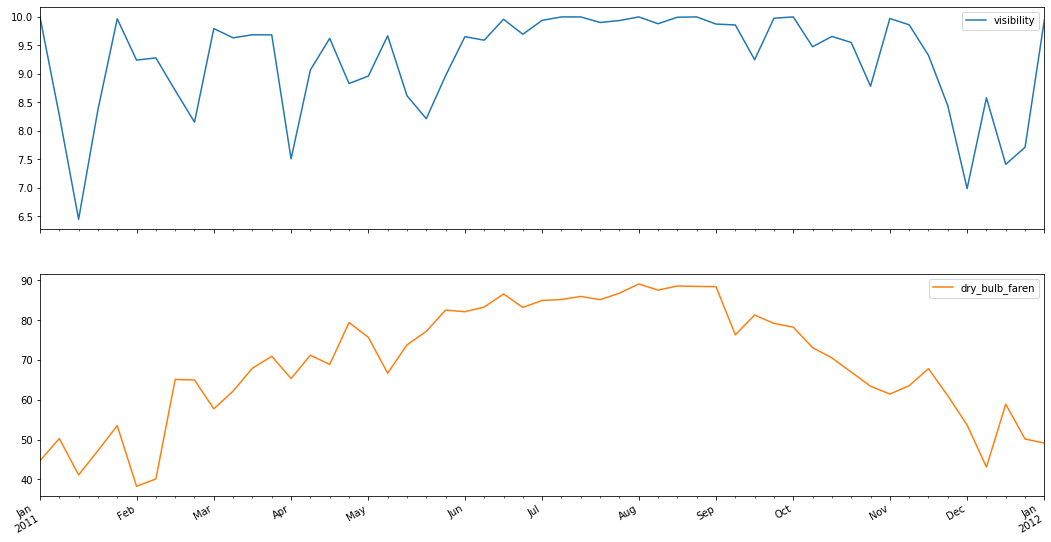

In [37]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True, figsize=(18, 10));

## 9. Daily hours of clear sky
In a previous exercise, you analyzed the 'sky_condition' column to explore the difference in temperature on sunny days compared to overcast days. Recall that a 'sky_condition' of 'CLR' represents a sunny day. In this exercise, you will explore sunny days in greater detail. Specifically, you will use a box plot to visualize the fraction of days that are sunny.

The 'sky_condition' column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

In [38]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean["sky_condition"] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [46]:
# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()
sunny_hours.head()

2011-01-01    11.0
2011-01-02     7.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05     1.0
Freq: D, Name: sky_condition, dtype: float64

In [47]:
# Calculate the number of measured hours per day
total_hours = resampled.count()
total_hours.head()

2011-01-01    23
2011-01-02    24
2011-01-03    26
2011-01-04    49
2011-01-05    29
Freq: D, Name: sky_condition, dtype: int64

In [48]:
# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours/total_hours
sunny_fraction.head()

2011-01-01    0.478261
2011-01-02    0.291667
2011-01-03    0.115385
2011-01-04    0.000000
2011-01-05    0.034483
Freq: D, Name: sky_condition, dtype: float64

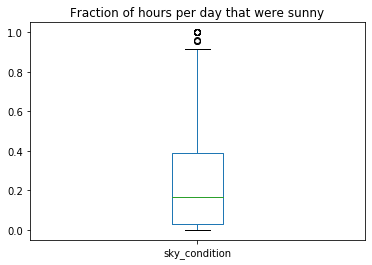

In [81]:
# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box', title = "Fraction of hours per day that were sunny");

The outlook for your Pandas skills is sunny! By contrast, the weather in the dataset is typically sunny less than 40% of the time.

## 10. Heat or humidity
Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

In this exercise, you will explore the maximum temperature and dew point of each month. The columns of interest are 'dew_point_faren' and 'dry_bulb_faren'. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots.

In [52]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[["dew_point_faren", "dry_bulb_faren"]].resample("M").max()
monthly_max

,dew_point_faren,dry_bulb_faren
2011-01-31,63.0,80.0
2011-02-28,70.0,85.0
2011-03-31,68.0,87.0
2011-04-30,73.0,93.0
2011-05-31,76.0,100.0
2011-06-30,75.0,104.0
2011-07-31,76.0,102.0
2011-08-31,76.0,110.0
2011-09-30,75.0,102.0
2011-10-31,72.0,93.0


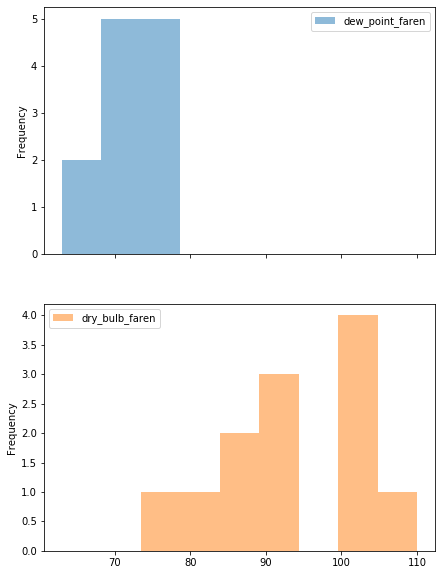

In [62]:
# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind="hist", bins = 9, alpha = 0.5, subplots = True, figsize = (7, 10));

 Uncomfortably, you will notice that the maximum dew point is above 65 every month!

## 11. Probability of high temperatures
We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final exercise, you will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, you will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. To do this, you will leverage your data manipulation, filtering, resampling, and visualization skills.

Your job is to select the maximum temperature in August in df_climate, and then maximum daily temperatures in August 2011. You will then filter to keep only the days in August 2011 that were above the August 2010 maximum, and use this to construct a CDF plot.

In [63]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate["Temperature"]["2010-Aug"].max()
august_max

95.3

In [71]:
# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean["dry_bulb_faren"]["2011-Aug"].resample("D").max()
august_2011.describe()

count     31.000000
mean     102.322581
std        2.970826
min       93.000000
25%      101.500000
50%      103.000000
75%      103.000000
max      110.000000
Name: dry_bulb_faren, dtype: float64

In [70]:
# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011[august_2011> august_max]
august_2011_high.describe()

count     30.000000
mean     102.633333
std        2.456284
min       96.000000
25%      102.000000
50%      103.000000
75%      103.000000
max      110.000000
Name: dry_bulb_faren, dtype: float64

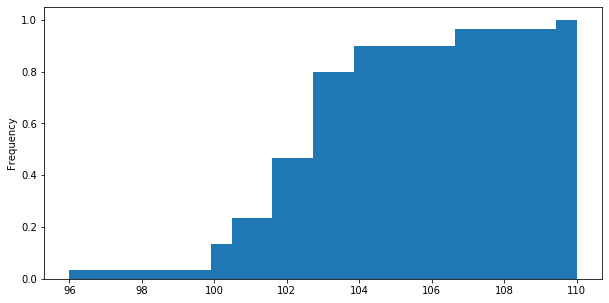

In [80]:
# Construct a CDF of august_2011_high
august_2011_high.plot(kind="hist", bins = 25, normed= True, cumulative= True, figsize=(10, 5));

Notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!